# Python and R

In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

# My commonly used R imports

require('tidyverse')


R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.0      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Read the data



The cell below loads the data in python:

In [5]:
df = pd.read_csv('raw-polls.csv')
df.sample(5)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
4604,16547,25205,1556,2008,2008_Sen-G_KY,KY,Sen-G,Sen-G,Research 2000,281,Live Phone,NaN,10/28/08,600.0,Bruce Lunsford,2651,DEM,44.0,Mitch McConnell,2650,REP,47.0,NaN,-3.0,11/4/08,47.03,52.97,-5.93,2.93,1.0,NaN
10772,73993,138823,8737,2020,2020_Sen-GR_GA,GA,Sen-G,Sen-GR,AtlasIntel,546,Live Phone/Online,NaN,1/3/21,857.0,Jon Ossoff,14567,DEM,51.3,David A. Perdue,14568,REP,46.8,NaN,4.5,1/5/21,50.61,49.39,1.23,3.27,1.0,NaN
9488,56781,91489,161,2018,2018_Gov-G_SD,SD,Gov-G,Gov-G,Emerson College,88,IVR/Online,NaN,11/3/18,514.0,Billie H. Sutton,11374,DEM,46.6,Kristi L. Noem,11375,REP,47.6,NaN,-1.0,11/6/18,47.60,50.97,-3.38,2.38,1.0,NaN
680,6372,87996,1421,2000,2000_Gov-G_MO,MO,Gov-G,Gov-G,Zogby Interactive/JZ Analytics,395,Live Phone,NaN,10/25/00,603.0,"Robert Lee Holden, Jr.",12967,DEM,41.0,Jim Talent,12965,REP,40.0,NaN,1.0,11/7/00,49.12,48.21,0.91,0.09,1.0,NaN
10152,72174,135375,8732,2020,2020_House-G_PR-1,PR-1,House-G,House-G,Data for Progress,522,Online/Text,NaN,10/23/20,439.0,Jenniffer González,15923,NPP,46.0,Aníbal Acevedo-Vilá,15924,PPD,34.0,8.0,12.0,11/3/20,41.18,32.16,9.02,NaN,1.0,NaN


The cell below loads the same data in R:

In [6]:
%%R

df <- read_csv('raw-polls.csv')

df

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 10,776 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998… NY      Gov-G   Gov-G   Blum &…      32
 2   26255     87926    1456  1998 1998… OH      Gov-G   Gov-G   Univer…     346
 3   26026     31266    1736  1998 1998… NV      Sen-G   Sen-G   FM3 Re…      91
 4   26013     31253    1738  1998 1998… NY      Sen-G   Sen-G   Blum &…      32
 5   63632    117103    1738  1998 1998… NY      Sen-G 

# Guided Exploration

In this section you'll make a few charts to explore the data. Here I will raise some questions for you to dig around in the data and answer. You can use summary statistics and/or charts to help answer the questions. You will have to make some methodological choices along the way. Be aware of what choices you're making! I'll ask you about them shortly.


## Question 1: How accurate are polls from the following pollsters?
Characterize the accuracy of each of these pollsters in a sentence or two. Then, write another few sentences justifying your characterization with insights from the data.
- Siena College/The New York Times Upshot
- Jayhawk Consulting
- Fox News/Beacon Research/Shaw & Co. Research
- Brown University
- American Research Group


In [65]:
%%R

abs(df$bias) %>% summary()

df_G <- df %>% 
    filter(type_simple %in% c('Pres-G', 'Sen-G', 'House-G', 'Gov-G'))

has_bias = df[!is.na(df$bias), ]

👉 **Siena College/The New York Times Upshot** 

In [66]:
%%R

abs(df$bias) %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   1.900   4.015   4.912   6.850  42.940    1952 


In [63]:
%%R

siena <- df %>% 
    filter(pollster=='Siena College/The New York Times Upshot')

abs(siena$bias) %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   1.907   4.070   4.362   5.885  15.010       1 


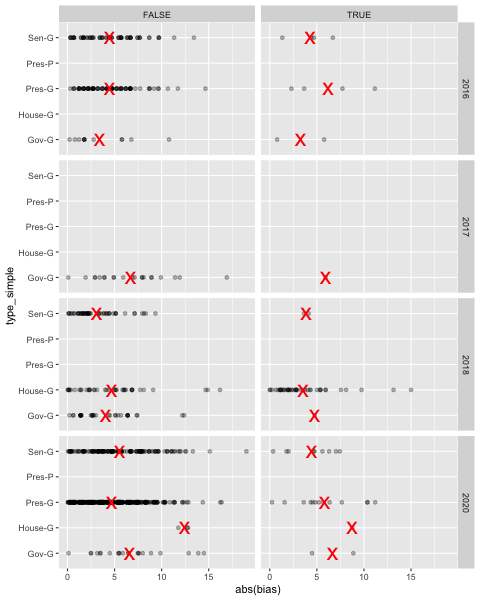

In [64]:
%%R -h 600

plot_abs_bias <- function(pollster_of_interest) {
    
    pollster_df <- df %>% filter(pollster==pollster_of_interest)
    
    only_races_this_pollster_has_polled <- pollster_df$race %>% unique()

    polls_from_races_this_pollster_has_polled <- df %>% filter(race %in% only_races_this_pollster_has_polled)
    
    ggplot(polls_from_races_this_pollster_has_polled) +
        aes(x=abs(bias), y=type_simple) +
        geom_point(alpha=.3) +
        stat_summary(fun.y=mean, geom="point", shape="x", size=8, color="red", alpha=1) +  
        facet_grid(year~pollster==pollster_of_interest)
    
}

plot_abs_bias('Siena College/The New York Times Upshot')


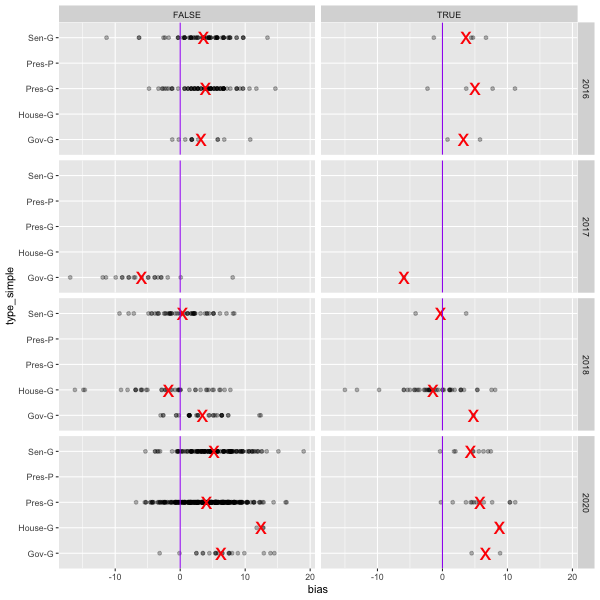

In [75]:
%%R -w 600 -h 600

plot_bias <- function(pollster_of_interest) {
    
    pollster_df <- df %>% filter(pollster==pollster_of_interest)
    
    only_races_this_pollster_has_polled <- pollster_df$race %>% unique()

    polls_from_races_this_pollster_has_polled <- df %>% filter(race %in% only_races_this_pollster_has_polled)
    
    ggplot(polls_from_races_this_pollster_has_polled) +
        aes(x=bias, y=type_simple) +
        geom_point(alpha=0.3) +
        stat_summary(fun.y=mean, geom="point", shape="x",
                     size=8, color="red", alpha=1) +
        geom_vline(aes(xintercept=0), color="purple") +
        facet_grid(year~pollster==pollster_of_interest)
    
}

plot_bias('Siena College/The New York Times Upshot')

In [119]:
%%R

bias_without_na <- na.omit(abs(siena$bias))
sd(bias_without_na)

[1] 3.166509


In general, Siena College/The New York Times Upshot polls are fairly accurate and are on par with the rest of the pollsters. It seems to have a weakness in presidential elections, as it had a slightly bigger bias toward the democratic candidatte for both 2016 and 2020 presidential elections than the average bias of other polls. However, it was not a significant difference. It is a good pollster in a way that it consistently performs well and reliable, without a noticeable outlier polls.

👉 **Jayhawk Consulting**

In [9]:
%%R

jayhawk <- df %>% 
    filter(pollster=='Jayhawk Consulting Services')

abs(jayhawk$bias) %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.29   34.95   37.62   37.62   40.28   42.94 


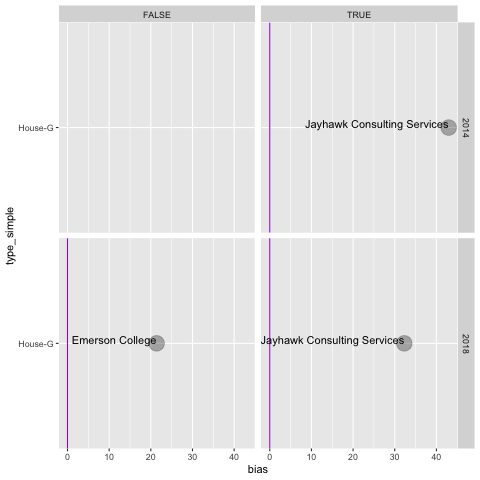

In [106]:
%%R

# plot_bias('Jayhawk Consulting Services')

pollster_of_interest <- 'Jayhawk Consulting Services'

pollster_df <- df %>% filter(pollster==pollster_of_interest)

only_races_this_pollster_has_polled <- pollster_df$race %>% unique()

polls_from_races_this_pollster_has_polled <- df %>% filter(race %in% only_races_this_pollster_has_polled)

ggplot(polls_from_races_this_pollster_has_polled) +
    aes(x=bias, y=type_simple) +
    geom_point(size=7, alpha=0.3) +
#     stat_summary(fun.y=mean, geom="point", shape="x",
#                  size=8, color="red", alpha=1) +
    geom_vline(aes(xintercept=0), color="purple") +
    geom_text(aes(label = pollster), hjust = 1, vjust = 0) +
    facet_grid(year~pollster==pollster_of_interest)

In [104]:
%%R

print(jayhawk)

# A tibble: 2 × 31
  poll_id question_id race_id  year race              location type_simple type_detail pollster                    pollster_rating_id methodology partisan polldate samplesize cand1_name      cand1_id cand1_party cand1_pct cand2_name     cand2_id cand2_party cand2_pct cand3_pct margin_poll electiondate cand1_actual cand2_actual margin_actual  bias rightcall comment            
    <dbl>       <dbl>   <dbl> <dbl> <chr>             <chr>    <chr>       <chr>       <chr>                                    <dbl> <chr>       <chr>    <chr>         <dbl> <chr>              <dbl> <chr>           <dbl> <chr>             <dbl> <chr>           <dbl>     <dbl>       <dbl> <chr>               <dbl>        <dbl>         <dbl> <dbl>     <dbl> <chr>              
1   36081       49015    5495  2014 2014_House-G_KS-1 KS-1     House-G     House-G     Jayhawk Consulting Services                157 Live Phone  D        10/26/14        400 James E. Sherow     5342 DEM                45 T

It is very difficult to assess Jayhawk Consulting Services as a pollster, since they have only conducted two polls. Both polls skew heavily toward Democrats. There is only one ther pollster, Emerson college, that can serve as a comparisonm, and it also shows strong bias towards the Democratic candidate. Overall, Jayhawk does not look like a reliable pollster and lacks volumn to establish itself as a consistent pollster.

👉 **Fox News/Beacon Research/Shaw & Co. Research**

In [117]:
%%R

abs(df$bias) %>% summary()

bias_without_na <- na.omit(abs(df$bias))
sd(bias_without_na)

[1] 4.0407


In [113]:
%%R

fox <- df %>% 
    filter(pollster=='Fox News/Beacon Research/Shaw & Co. Research')

abs(fox$bias) %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -5.870  -0.290   2.630   3.073   6.060  15.610      15 


In [116]:
%%R

bias_without_na <- na.omit(abs(fox$bias))
sd(bias_without_na)

[1] 3.52183


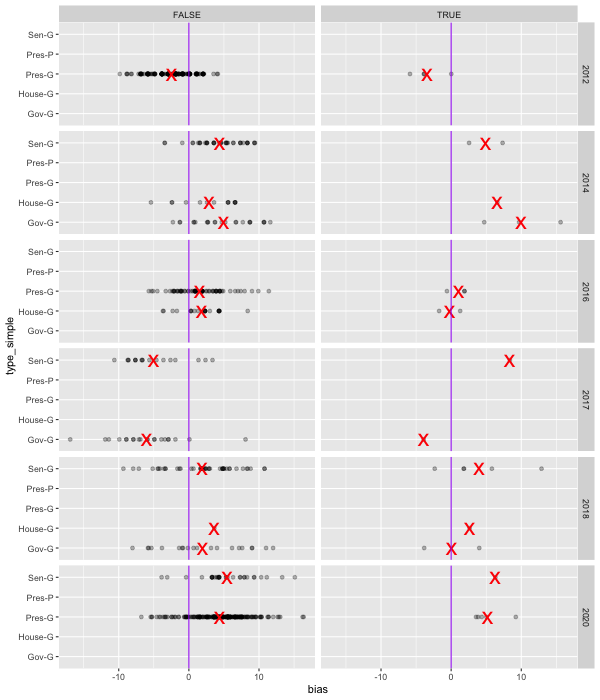

In [111]:
%%R -w 600 -h 700

plot_bias('Fox News/Beacon Research/Shaw & Co. Research')

Based on the summary statistics, Fox News/Beacon Research/Shaw & Co. Research comparably to the average pollster, with slightly better performance in terms of having smaller average bias. However, its standard deviation is greater than the Siena Poll, meaning it some of its polls can be quite off sometimes. 

👉 **Brown University**

In [11]:
%%R

brown <- df %>% 
    filter(pollster=='Brown University')

abs(brown$bias) %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  3.870   6.100   8.270   8.827  10.465  16.520       5 


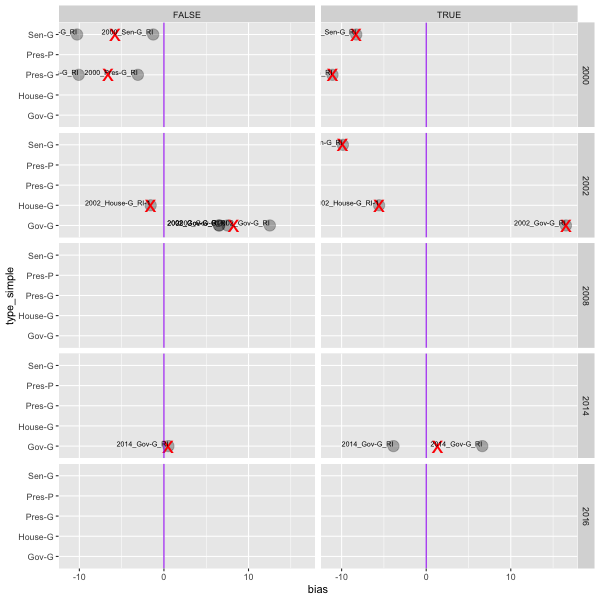

In [130]:
%%R -w 600 -h 600

pollster_of_interest <- 'Brown University'

pollster_df <- df %>% filter(pollster==pollster_of_interest)

only_races_this_pollster_has_polled <- pollster_df$race %>% unique()

polls_from_races_this_pollster_has_polled <- df %>% filter(race %in% only_races_this_pollster_has_polled)

ggplot(polls_from_races_this_pollster_has_polled) +
    aes(x=bias, y=type_simple) +
    geom_point(size=5, alpha=0.3) +
    stat_summary(fun.y=mean, geom="point", shape="x",
                 size=8, color="red", alpha=1) +
    geom_vline(aes(xintercept=0), color="purple") +
    geom_text(aes(label = race), hjust = 1, vjust = 0, size=2.5) +
    facet_grid(year~pollster==pollster_of_interest)

Brown University, while not having too many polls to examine, does not have a good track record in terms of large bias. However, as with Jayhawk, it also does not have very many pollsters to compare to. Its polls are all based in RI and shows both Republican and Democratic bias, showing its bias is not consistent in direction. I would not rely too much on their poll.

👉 **American Research Group**

In [134]:
%%R

abs(df$bias) %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   1.900   4.015   4.912   6.850  42.940    1952 


In [12]:
%%R

arg <- df %>% 
    filter(pollster=='American Research Group')

abs(arg$bias) %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.130   1.738   3.425   4.245   5.652  26.760     191 


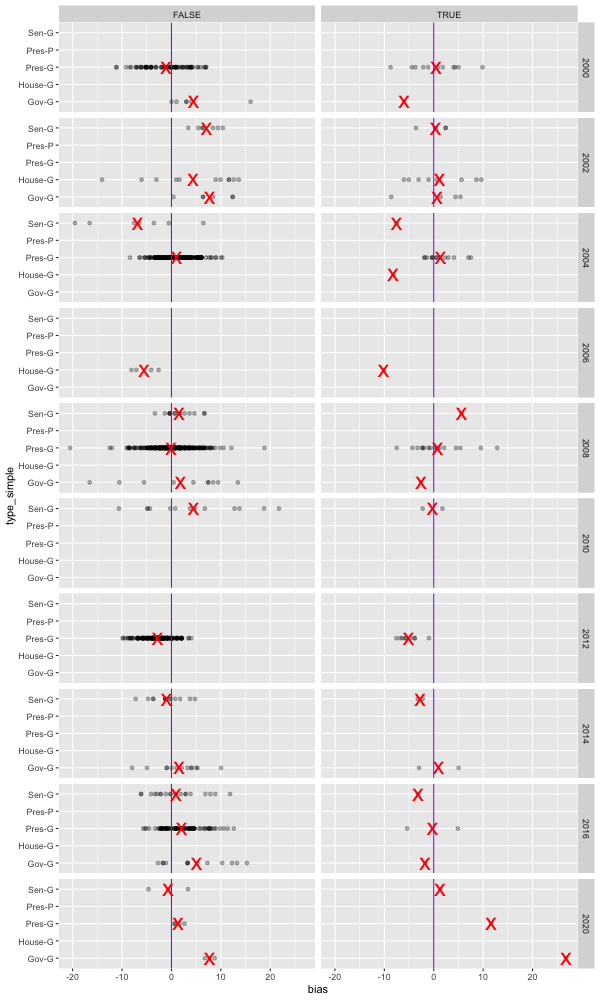

In [133]:
%%R -w 600 -h 1000

plot_bias('American Research Group')

American Research Group has a pretty good track record of keeping the bias low. But they perform well in elecctions where other pollsters have also gotten good results. They still show slightly better performance based on mean and median bias. In 2020, American Research Group had large Democratic bias in presidential andd gubernatorial elections.

### Question 2: Which pollsters are the most accurate? Which are the least accurate?

👉 Which pollsters are the most accurate?

In [13]:
df.head()

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
0,26013,87909,1455,1998,1998_Gov-G_NY,NY,Gov-G,Gov-G,Blum & Weprin Associates,32,Live Phone,NaN,10/13/98,364.0,Peter Vallone,13080,DEM,26.0,George Pataki,13083,REP,57.0,9.0,-31.0,11/3/98,33.16,54.32,-21.15,-9.85,1.0,for New York Daily News | WABC-TV (New York)
1,26255,87926,1456,1998,1998_Gov-G_OH,OH,Gov-G,Gov-G,University of Cincinnati (Ohio Poll),346,Live Phone,NaN,10/13/98,540.0,Lee Fisher,13085,DEM,37.0,Bob Taft,13086,REP,52.0,NaN,-15.0,11/3/98,44.69,50.05,-5.36,-9.64,1.0,NaN
2,26026,31266,1736,1998,1998_Sen-G_NV,NV,Sen-G,Sen-G,FM3 Research,91,Live Phone,D,10/13/98,488.0,Harry Reid,3964,DEM,49.0,John Ensign,3965,REP,44.0,NaN,5.0,11/3/98,47.86,47.77,0.09,4.91,1.0,for unspecified Democratic sponsor
3,26013,31253,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Blum & Weprin Associates,32,Live Phone,NaN,10/13/98,364.0,Charles E. Schumer,3966,DEM,44.0,Alfonse M. D'Amato,3967,REP,52.0,NaN,-8.0,11/3/98,54.62,44.08,10.54,-18.54,0.0,for New York Daily News | WABC-TV (New York)
4,63632,117103,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Garin-Hart-Yang Research Group,113,Live Phone,D,10/13/98,902.0,Charles E. Schumer,3966,DEM,46.0,Alfonse M. D'Amato,3967,REP,42.0,NaN,4.0,11/3/98,54.62,44.08,10.54,-6.54,1.0,for Charles E. Schumer


In [15]:
df['bias_abs'] = df.bias.abs()

In [28]:
gen = ['Pres-G', 'Sen-G', 'House-G', 'Gov-G']
gen_df = df[df.type_simple.isin(gen)]

has_bias = df[~df.bias.isna()]

In [31]:
has_bias.groupby('pollster').bias_abs.median().sort_values().head()

pollster
Winthrop University          0.18
Amber Integrated             0.38
Missouri State University    0.50
1892 Polling                 0.61
Ogden & Fry                  0.65
Name: bias_abs, dtype: float64

👉 Which are the least accurate?

In [30]:
has_bias.groupby('pollster').bias_abs.median().sort_values().tail()

pollster
Bainbridge Media Group         21.180
Dane & Associates              21.300
Massie & Associates            23.980
Riggs Research Services        33.650
Jayhawk Consulting Services    37.615
Name: bias_abs, dtype: float64

According to the absolute value of bias, Winthrop University has 0.18 absolute median bias, appearing as the best among pollsters. Bainbridge Media Group, on the other hand, has an absolute median bias of 21.18, the biggest among pollsters and the worst one by this standard. 

### Question 2 Reflections

👉 Write a summary paragraph explaining how you decided what constitutes “most accurate” and "least accurate"?


The most accurate pollster is, based on all of their polls, has the smallest absolute median bias. The least accurate pollster has the biggest absolute media bias.

👉 In bullet point form, name **methodological choices** you made in the process of determining which pollsters were the most and least accurate.


- I decided to look at how much it diverges from the actual result, ignoring the directin.
- I decided to ignore the number of polls that the pollster has done.

👉 In bullet point form, list the **limitations** of your approach 


- Because I am not looking at the number of polls, it may include pollster that has one "lucky" accurate poll that might not be so consistent.